# Step 1: Installing the dependencies

In [1]:
! pip install ultralytics
! pip install roboflow
! pip install paddlepaddle
! pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 523.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

# Step 2 : Importing the libraries

In [2]:
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
print("Everything Imported Succesfully")

Everything Imported Succesfully


# Step 3: Loading the data from Sources

In [3]:
def download_roboflow_datasets(api_key):

    rf = Roboflow(api_key=api_key)

    # Barcode and QR code dataset
    barcode_project = rf.workspace("labeler-projects").project("barcodes-zmxjq")
    barcode_version = barcode_project.version(5)
    barcode_dataset = barcode_version.download("yolov8")

    # Face dataset
    face_project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
    face_version = face_project.version(24)
    face_dataset = face_version.download("yolov8")

    return barcode_dataset, face_dataset

# Calling function to download the dataset
api_key = "n1ABopnSJ5lecNtDlEe4"
barcode_dataset, face_dataset = download_roboflow_datasets(api_key)


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Barcodes-5 in yolov8:: 100%|██████████| 63032/63032 [00:16<00:00, 3738.99it/s]


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Face-Detection-24 in yolov8:: 100%|██████████| 7643/7643 [00:01<00:00, 4454.45it/s]


# Important Note ⚠️
The above function will only load the face and QR/barcode datasets. For the face dataset, we have merged four datasets (three publicly available and one personally created). So instead of training the model yourself, you can simply access the pre-trained model provided by us whereas for the QR-Barcode and face model training follow next steps.

`Before moving further` : Make sure the data.yaml file is updated with your system path, and the folder structure looks something like this:

- Main Folder
    - train
        - images
        - labels
    - val
        - images
        - labels

Make sure the names of the folders are exactly as mentioned above and the data.yaml file is updated with your own system paths correctly; otherwise, the training will not start.

# Step 4 : Training the QR-BarCode Model

- Rename the valid folder to val folder
- Update the paths of the yaml file accordingly

In [ ]:
def train_qr_bar_model(qr_bar_yaml_file_path, model_weights="yolov8l.pt", epochs=100, imgsz=640):

    # Load the YOLO model with the specified weights
    qr_bar_model = YOLO(model_weights)

    # Train the model with the provided YAML file path
    results = qr_bar_model.train(data=qr_bar_yaml_file_path, epochs=epochs, imgsz=imgsz)

    return results

# Example usage
qr_bar_yaml_file_path = "/content/Barcodes-5/data.yaml"
qr_bar_results = train_qr_bar_model(qr_bar_yaml_file_path)

100%|██████████| 131M/131M [00:00<00:00, 226MB/s]


Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Barcodes-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

train: Scanning /content/Barcodes-5/train/labels... 28696 images, 459 backgrounds, 0 corrupt: 100%|██████████| 28696/28696 [00:19<00:00, 1480.65it/s]


train: New cache created: /content/Barcodes-5/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Barcodes-5/val/labels... 2382 images, 46 backgrounds, 0 corrupt: 100%|██████████| 2382/2382 [00:01<00:00, 1373.05it/s]


val: New cache created: /content/Barcodes-5/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1794 [00:00<?, ?it/s]

# Step 5 : Training the Face Model

- Rename the test folder to val folder
- Update the paths of the yaml file accordingly

In [ ]:
def train_face_model(face_yaml_file_path, model_weights="yolov8l.pt", epochs=100, imgsz=640):

    # Load the YOLO model with the specified weights
    face_model = YOLO(model_weights)

    # Train the model with the provided YAML file path
    results = face_model.train(data=face_yaml_file_path, epochs=epochs, imgsz=imgsz)

    return results

# Example usage
face_yaml_file_path = "/content/Face-Detection-24/data.yaml"
face_results = train_face_model(face_yaml_file_path)

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Face-Detection-24/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/Face-Detection-24/train/labels... 3672 images, 684 backgrounds, 0 corrupt: 100%|██████████| 3672/3672 [00:03<00:00, 1088.40it/s]


train: New cache created: /content/Face-Detection-24/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Face-Detection-24/val/labels... 145 images, 26 backgrounds, 0 corrupt: 100%|██████████| 145/145 [00:00<00:00, 1011.77it/s]

val: New cache created: /content/Face-Detection-24/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/230 [00:00<?, ?it/s]

# Step 6: How to use trained files

After trainng the face and qr-bar code model. Follow the below mentioned steps

- Move to runs/detect/train/weights/best.pt
- Grab the trained model file
- Do the same for the Face detection model
- Head over to the `Information_Masking_Pipeline.ipynb` file and update the paths
- Run the Main masking function to automatically embed the trained models into complete pipeline

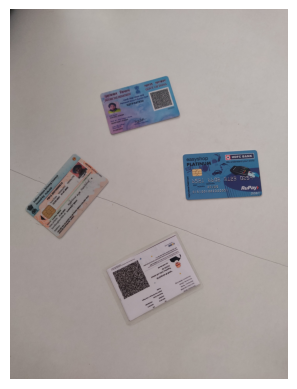

In [ ]:
# Just a demonstration of our own trained the Card model.
# One can access this file from artifacts/Personal Cards/

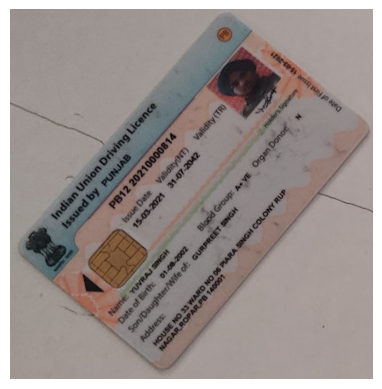

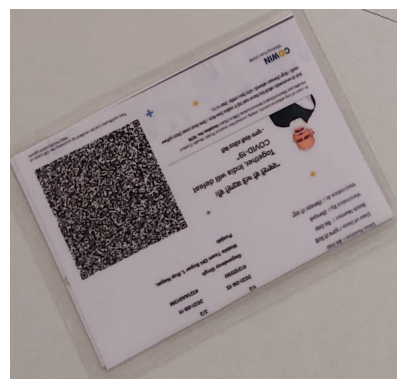

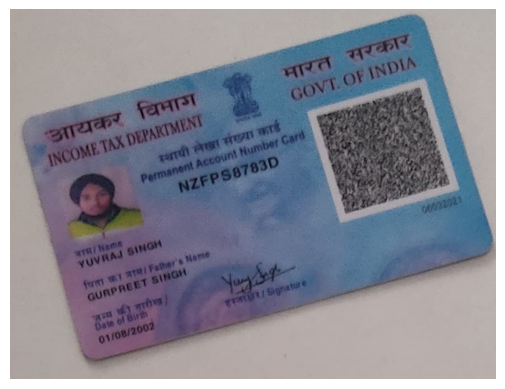

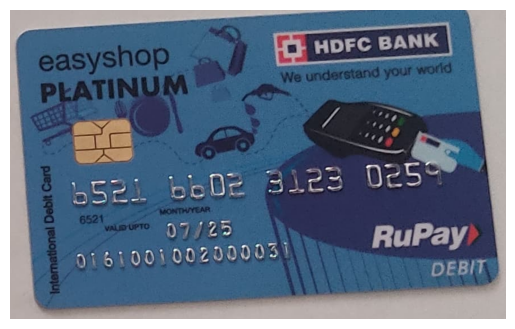

In [ ]:
# These are the individual bounding boxes of the cards detected.